In [1]:
import json, os
import numpy as np
import h5py
from scipy.misc import imsave

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def moving_average(xs, n=301, mode='same'):
  w = np.ones(n) / n
  return np.convolve(xs, w, mode=mode)

def show_checkpoint(path, low=0, high=None, window=301):
  with open(path, 'r') as f:
    checkpoint = json.load(f)

  train_loss = checkpoint['train_loss_history']
  val_loss = checkpoint['val_loss_history']
  val_loss_ts = checkpoint['val_loss_history_ts']

  print checkpoint['opt']['style_image']
  # if 'seated' not in checkpoint['opt']['style_image']: return
  
  print checkpoint['opt']['arch']
  print checkpoint['opt']['percep_loss_weight']
  print checkpoint['opt']['checkpoint_name']
  print 'style weight: ', checkpoint['opt']['style_weight']
  
  if False and 'style_loss_history' in checkpoint:
    for k, v in checkpoint['style_loss_history'].iteritems():
      plt.plot(v, lw=3,label=k)
  
  plt.plot(train_loss, 'o')
  plt.plot(moving_average(train_loss, window), 'c-', lw=1)
  plt.plot(val_loss_ts, val_loss, 'ro', lw=3)
  plt.plot(val_loss_ts, moving_average(val_loss, 1), 'y-', lw=3)
  # plt.legend()
  if high is not None:
    plt.gca().set_ylim([low, high])
  plt.show()

examples/inputs/la_muse.jpg
c9s1-64,R64,R64,R64,R64,u64,u64,c9s1-3
1
data/checkpoint
style weight:  1


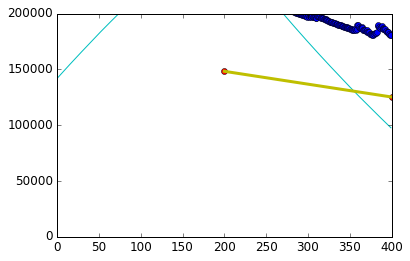

In [35]:
show_checkpoint('data/checkpoint.json', low=0, high=200000)

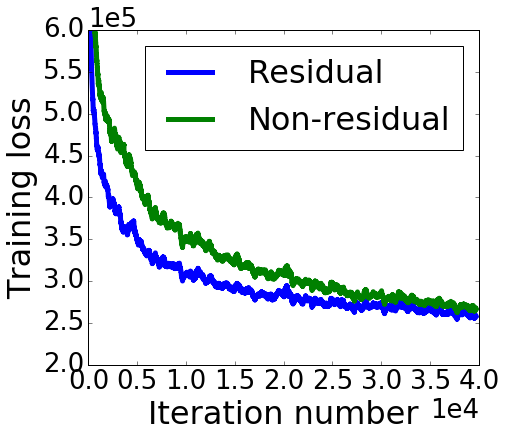

In [34]:
res_checkpoint = 'data/checkpoints/style/good/the_wave.json'
nores_checkpoint = 'data/checkpoints/style/3_7/the_wave_nores.json'

with open(res_checkpoint, 'r') as f:
  res_losses = json.load(f)['train_loss_history']
with open(nores_checkpoint, 'r') as f:
  nores_losses = json.load(f)['train_loss_history']
res_losses = res_losses[:len(nores_losses)]

# plt.plot(res_losses, 'o')
# plt.plot(nores_losses, 'o')
plt.plot(moving_average(res_losses, mode='valid'), '-', lw=5, label='Residual')
plt.plot(moving_average(nores_losses, mode='valid'), '-', lw=5, label='Non-residual')
plt.gca().set_ylim([2e5, 6e5])
plt.rc('font', size=26)
plt.xlabel('Iteration number', fontsize=32)
plt.ylabel('Training loss', fontsize=32)
plt.legend(fontsize=32)
plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
plt.gcf().set_size_inches(7, 6)
plt.savefig('paper/submission/figures/res_vs_nores_loss.png', bbox_inches='tight')
plt.show()

examples/inputs/la_muse.jpg
c9s1-64,R64,R64,R64,R64,u64,u64,c9s1-3
1
data/checkpoints/upsample/3_8_sigma/4x_feat
style weight:  1


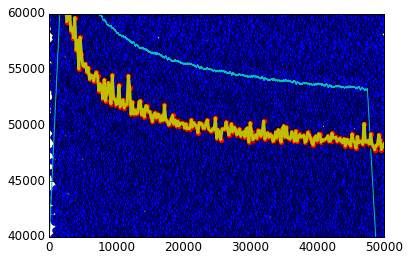

examples/inputs/la_muse.jpg
c9s1-64,R64,R64,R64,R64,u64,u64,c9s1-3
1
data/checkpoints/upsample/3_8_sigma/4x_feat_200k
style weight:  1


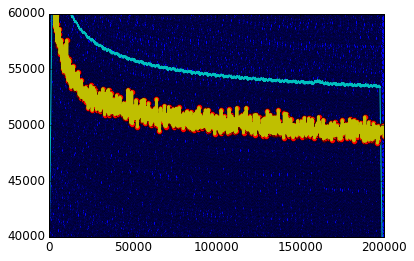

In [8]:
checkpoint_dir = 'data/checkpoints/upsample/3_8_sigma/'
plt.rc('font', size=12)
for fn in os.listdir(checkpoint_dir):
  if not fn.endswith('.json'): continue
  if not '4x_feat' in fn: continue
  if 'feat' in fn: low, high = 40000, 60000
  if 'pixel' in fn: low, high = 400, 800
  show_checkpoint(os.path.join(checkpoint_dir, fn), low=low, high=high, window=5001)
  
#show_checkpoint('data/checkpoints/style/good/composition_vii.json', low=3e5, high=1e6)

In [ ]:
### checkpoint_dir = 'data/checkpoints/style/3_3_deeper/' 
for fn in os.listdir(checkpoint_dir):
  if not fn.endswith('.json'): continue
  show_checkpoint(os.path.join(checkpoint_dir, fn), low=600, high=700)

[203.20680236816, 166.32622528076, 161.78169250488, 160.05696868896, 145.27696990967, 122.39995956421, 153.48081207275, 104.57091903687, 107.27353286743, 124.9938583374, 94.933460235596, 96.433265686035, 99.054508209229, 94.696388244629, 90.184387207031, 107.24966812134, 122.88180541992, 86.256195068359, 93.705711364746, 116.30646896362, 85.218711853027, 85.436637878418, 90.590595245361, 94.708667755127, 86.012409210205, 85.106475830078, 86.33988571167, 89.058418273926, 88.463092803955, 87.870910644531, 83.898910522461, 86.816848754883, 86.006637573242, 84.392551422119]
c7s1-128,r128,r128,u64,r64,r64,u32,r32,r32,c7s1-3
0
data/checkpoints/upsample/2_28/151483


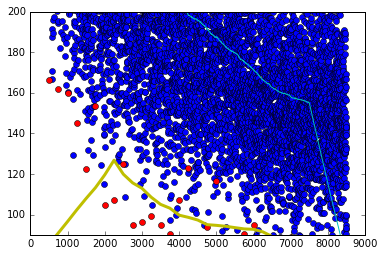

[338.61627960205, 333.06262588501, 278.31316757202, 218.59621810913, 213.58178710938, 221.06651306152, 214.80660247803, 213.96789550781, 212.23222351074, 213.30438613892, 202.3649520874, 197.30628585815, 212.42280960083, 193.14894866943, 180.45018005371, 194.13147354126, 201.30170440674, 181.7339553833, 182.81922149658, 194.2286605835, 183.68730926514, 181.01680374146, 179.76861190796, 184.24347305298, 174.8161277771, 175.5966796875, 174.45581817627, 176.4912071228, 175.42072296143, 174.84209823608, 173.59832382202, 174.29168701172, 176.92431259155, 173.93779373169, 176.31884002686, 178.81330871582, 173.23444366455, 175.06481170654, 173.25008010864, 177.76372528076, 174.08106994629, 173.24137115479, 172.43713378906, 176.61951828003, 177.28133392334, 173.93392562866, 173.32979202271, 177.4038734436, 173.77716064453, 172.91205215454, 174.26078033447, 173.59511566162, 173.51109695435, 172.6495552063, 171.86255264282, 173.3920173645, 175.52109909058, 173.08545684814, 173.49158859253, 173.9

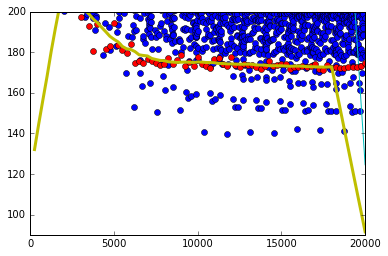

[390.20516204834, 303.19646453857, 262.12578582764, 251.35663223267, 233.20909500122, 251.53200531006, 248.67132568359, 232.03498077393, 214.01067352295, 227.95998764038, 201.56757736206, 215.03882217407, 197.29521179199, 223.97901916504, 194.18062973022, 201.95449066162, 200.69237518311, 197.29758834839, 191.79299926758, 202.73558807373, 189.15849685669, 189.24843597412, 194.83471298218, 196.32563018799, 184.97582244873, 188.0269203186, 188.93333435059, 187.09240341187, 186.24394226074, 190.84337615967, 183.87126541138, 191.15446090698, 186.2360496521, 183.71864318848, 185.82165908813, 186.05745697021, 183.56969833374, 184.32085037231, 182.33943557739, 181.66062927246, 183.31077575684, 180.88815307617, 181.27815246582, 184.63795852661, 185.17487716675, 181.72115325928, 182.95678710938, 185.28730010986, 181.25852966309, 181.77309036255, 181.57901763916, 181.60964584351, 184.63119888306, 181.23963546753, 180.72861099243, 182.43225479126, 181.6558265686, 180.62094116211, 181.04788589478,

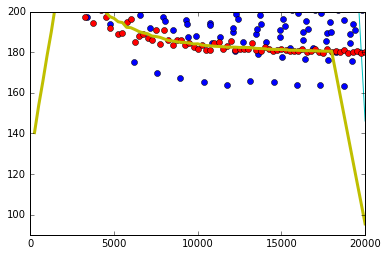

[331.36679077148, 290.36136627197, 278.77809906006, 214.1092300415, 223.97475814819, 232.71553421021, 254.35691833496, 231.83557891846, 204.81618499756, 208.333568573, 205.53469848633, 190.67652511597, 193.22400283813, 198.4716835022, 182.17388534546, 193.80450439453, 225.94137191772, 183.59017562866, 184.24869918823, 188.54065322876, 196.31468963623, 183.9188041687, 181.33459854126, 184.74370574951, 176.58722305298, 176.40977859497, 176.73386764526, 177.94575881958, 180.13304901123, 176.75287628174, 175.7873840332, 176.28979873657, 180.11747360229, 178.85385513306, 173.71161270142, 178.34840011597, 174.75828170776, 176.47116088867, 174.63451766968, 176.95766067505, 174.75815200806, 174.26424789429, 173.65341186523, 177.06031036377, 175.28050231934, 175.78910064697, 176.91661834717, 178.27913665771, 176.41346359253, 176.76202774048, 175.08585357666, 176.03829956055, 173.54903411865, 173.56998443604, 174.55902862549, 175.07769775391, 178.76014709473, 175.94834518433, 173.07253265381, 17

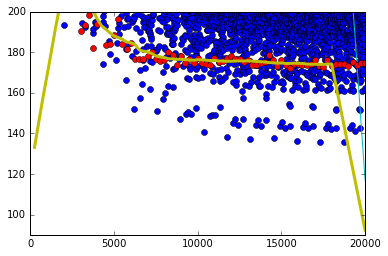

[218.6434173584, 175.4436416626, 227.11856079102, 145.23712921143, 158.38170623779, 135.06125640869, 165.97408294678, 129.12678527832, 130.04797744751, 137.8670501709, 104.29968643188, 113.69478988647, 108.03123855591, 130.81410598755, 102.03682327271, 108.52647018433, 111.60009002686, 108.53521347046, 101.67513275146, 112.09799575806, 102.10499572754, 99.365631103516, 103.53131103516, 103.04315948486, 94.741184234619, 98.301624298096, 97.652572631836, 98.505428314209, 96.00952911377, 101.95942306519, 94.160755157471, 101.97798538208, 98.586345672607, 93.056842803955, 93.622497558594, 93.053649902344, 94.09411239624, 94.888114929199, 92.353736877441, 93.101161956787, 93.934143066406, 90.899272918701, 91.237823486328, 95.011512756348, 93.160583496094, 93.45068359375, 91.908855438232, 94.246227264404, 91.479011535645, 92.133117675781, 91.556205749512, 92.00931930542, 94.0891456604, 90.860210418701, 90.588134765625, 91.739753723145, 91.854724884033, 91.099529266357, 90.778003692627, 92.62

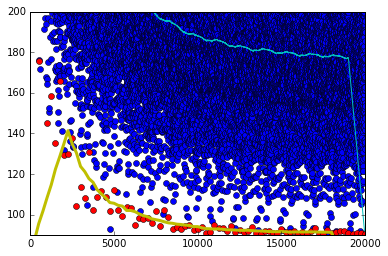

[223.42848968506, 199.91568756104, 181.72840881348, 143.01288604736, 121.9411315918, 137.68356323242, 151.55690765381, 137.58558654785, 124.69172286987, 135.56545257568, 103.72555923462, 113.7765007019, 106.00890350342, 100.60847473145, 95.772228240967, 108.5894203186, 112.81667327881, 86.438980102539, 103.04941558838, 100.24187850952, 89.48087310791, 88.186958312988, 97.099632263184, 91.073154449463, 87.842628479004, 86.225143432617, 87.027069091797, 91.509384155273, 92.923831939697, 86.609481811523, 85.770244598389, 85.554153442383, 91.196548461914, 83.619411468506, 85.557231903076, 87.950595855713, 87.384258270264, 84.18590927124, 83.977237701416, 87.227390289307, 85.938629150391, 82.845909118652, 83.652435302734, 84.524803161621, 85.127201080322, 83.805717468262, 84.089328765869, 85.797561645508, 85.30687713623, 86.274158477783, 83.364974975586, 85.545101165771, 83.36559677124, 85.415138244629, 84.765979766846, 83.379089355469, 86.399211883545, 84.938346862793, 83.421333312988, 85.

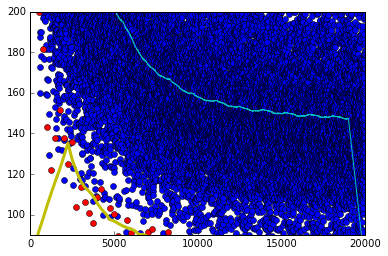

In [196]:
checkpoint_dir = 'data/checkpoints/upsample/2_28' 
for fn in os.listdir(checkpoint_dir):
  if not fn.endswith('.json'): continue
  show_checkpoint(os.path.join(checkpoint_dir, fn), 200)

[296.82000732422, 221.18788146973, 191.92013549805, 184.6768951416, 171.85662841797, 156.62509155273, 143.28994750977, 148.8878326416, 157.7752532959, 183.38026428223, 167.77952575684, 127.79250335693, 125.50118255615, 131.59332275391, 126.27321624756, 135.15911865234, 123.12339782715, 122.86696624756, 126.15647888184, 121.26164245605, 115.91426849365, 109.260887146, 118.51181793213, 109.48573303223, 105.75208282471, 114.45583343506, 106.30289459229, 113.97288513184, 107.22295379639, 103.29714202881, 103.68276977539, 103.06121826172, 106.32111358643, 101.08094787598, 99.981369018555, 102.2671661377, 101.86071777344, 104.75762939453, 100.15365600586, 99.017784118652, 98.184410095215, 97.686622619629, 98.445274353027, 100.47559356689, 98.638259887695, 97.717323303223, 97.299530029297, 98.03662109375]
c9s1-64,u32,u32,f7s1-3
0
data/checkpoint


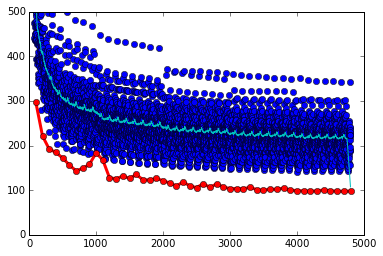

In [109]:
show_checkpoint('data/checkpoint.json', 500)

[148.45813903809, 149.97836456299, 150.67962036133]
c7s1-64,r64,r64,r64,u32,u16,c3s1-16,c7s1-3
1
data/checkpoints/upsample/percep1/523801


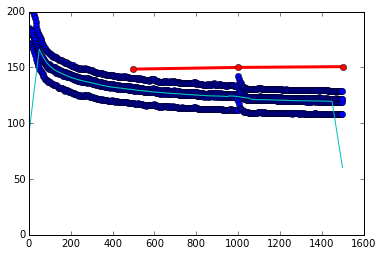

[326.80827026367, 303.86674041748, 295.09855728149, 288.28967208862, 284.40996398926, 283.62184524536]
c7s1-64,r64,r64,r64,u32,u16,c3s1-16,c7s1-3
1
data/checkpoints/upsample/percep1/658545


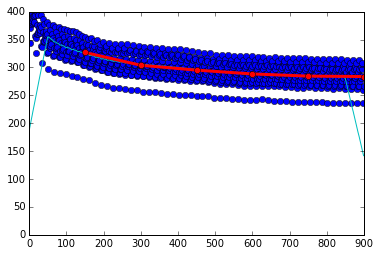

[212.05183288574, 195.23870437622, 188.00220718384, 182.75435791016, 179.90487838745, 178.66618164062, 176.20802841187, 174.86251907349, 174.21391418457, 173.43272140503, 173.57509735107, 173.47969696045, 172.16583190918, 171.12913970947, 171.55061676025, 171.31418701172, 171.03924240112, 170.69252212524]
c7s1-64,r64,r64,r64,u32,u16,c3s1-16,c7s1-3
1
data/checkpoints/upsample/percep1/169655


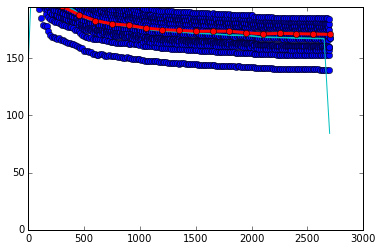

[226.98865081787, 191.8391015625, 189.0766986084, 179.3544593811, 175.87735122681, 179.76348495483, 172.55746337891, 170.47996459961, 168.26984024048, 168.41309036255, 169.60902984619, 166.89272338867, 169.48844528198, 166.26041244507, 165.93251647949, 166.84249099731, 164.75603240967, 164.71075775146, 164.5473274231, 164.7415802002, 163.82735687256, 163.85173583984, 163.74835403442, 163.51954269409, 162.9223236084, 162.79602996826, 162.78937545776, 162.97905914307, 163.32953689575, 163.33213027954, 162.56918685913, 162.62905273437, 162.19661392212, 162.20813278198, 162.56099761963, 162.60070785522, 162.5516506958, 162.58897598267, 162.52542663574, 162.31795776367, 161.9441053772, 162.06478775024, 162.31652893066, 162.0160269165, 161.956693573, 161.88723358154, 161.83597946167, 161.87485153198, 161.906590271, 161.8852885437, 161.88846969604, 161.89198287964, 161.72071075439, 161.77712905884, 161.82076049805, 161.87927261353, 161.89403198242, 161.66592529297, 161.68029067993, 161.771621

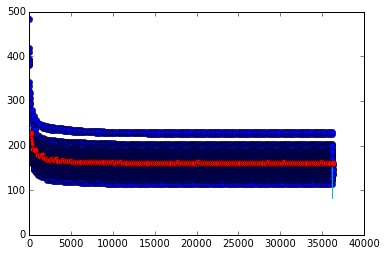

[1025.0322998047, 687.40559082031, 712.98901977539, 650.83443603516, 714.81699829102, 613.55586547852, 655.03418884277, 591.2771270752, 596.98129577637, 576.48750610352, 583.95945739746, 578.32383117676, 582.02433776855, 578.45149536133, 573.90279846191, 584.20580444336, 565.87780151367, 561.91449890137, 565.22132873535, 564.80407714844, 564.50392150879, 566.44208679199, 563.08360595703, 556.36189575195, 557.27017211914, 555.93271179199, 559.62544250488, 557.20024414063, 555.03963317871, 555.5998046875, 554.00728149414, 553.61314697266, 554.06673583984, 552.91564025879, 557.98285522461, 555.69563903809, 553.00383911133, 553.87662658691, 553.39359436035, 552.67324829102, 550.90447998047, 551.07239685059, 552.7092376709, 552.44358520508, 551.1713684082, 551.33406677246, 550.62940368652, 550.13780822754, 551.6520324707, 549.54795837402, 550.89321899414, 550.6119934082, 549.81946105957, 551.64439697266, 550.97628173828, 551.28798828125, 550.26402587891, 549.51574401855, 549.65855102539, 54

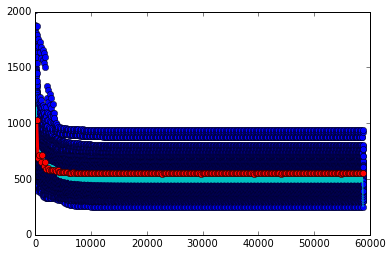

[629.23076171875, 343.7513961792, 373.54313049316, 324.10574798584, 339.04142913818, 287.45305328369, 430.20249023437, 257.58141784668, 311.36914978027, 230.75996551514, 273.28103485107, 239.65651550293, 272.74314117432, 228.65909729004, 221.75551452637, 231.04310913086, 212.53639373779, 211.12554626465, 222.46503448486, 211.18662872314, 210.60751647949, 218.94326171875, 210.77944488525, 212.57089080811, 207.04117431641, 202.25971832275, 204.83807830811, 205.86790161133, 202.44458770752, 202.47790985107, 203.50271606445, 200.63620147705, 201.49931488037, 202.21629943848, 204.18778991699, 206.76549377441, 200.83882904053, 200.22598114014, 201.26488647461, 206.22704772949, 199.34367523193, 200.78593444824, 205.14460449219, 202.38024749756, 198.73337402344, 198.93674163818, 199.51265716553, 198.88557281494, 199.93780517578, 198.72245635986, 199.45737304688, 198.86604003906, 199.43437042236, 201.42462768555, 200.46973724365, 199.43462524414, 198.89932403564, 197.93161621094, 198.4748947143

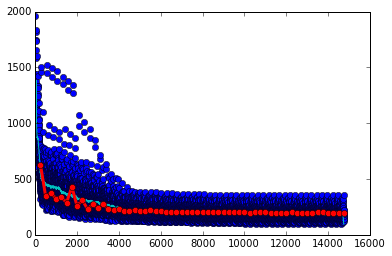

[285.77035003662, 201.5579296875, 199.8174256897, 187.13091705322, 175.17223648071, 166.46285583496, 160.37045608521, 152.61085113525, 150.51638473511, 149.11511474609, 148.90176773071, 148.24494735718, 153.43717041016, 145.83858642578, 143.82006240845, 144.98334472656, 143.19256515503, 143.4538269043, 142.43225738525, 141.43490036011, 140.12407577515, 141.1068057251, 139.2754675293, 139.00992553711, 138.20711517334, 137.98282836914, 138.18181716919, 138.42209503174, 138.74337203979, 138.5212638855, 137.14168457031, 137.57687698364, 137.37860427856, 136.91963500977, 137.3858543396, 137.36765350342, 137.11757293701, 137.44644607544]
c7s1-128,r128,r128,r128,u32,u16,c3s1-16,c7s1-3
1
data/checkpoints/upsample/percep2/88339


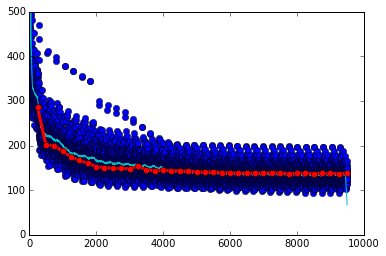

In [56]:
# show_checkpoint('data/checkpoints/upsample/cv1/157430.json')
# show_checkpoint('data/checkpoints/upsample/cv1/781696.json')
# show_checkpoint('data/checkpoints/upsample/cv1/460375.json')

# show_checkpoint('data/checkpoints/upsample/overfit/56309.json')
# show_checkpoint('data/checkpoints/upsample/overfit/35167.json')
# show_checkpoint('data/checkpoints/upsample/overfit/584091.json')

# show_checkpoint('data/checkpoints/upsample/cv2/230413.json')
# show_checkpoint('data/checkpoints/upsample/cv2/904214.json')
# show_checkpoint('data/checkpoints/upsample/cv2/74140.json')
# show_checkpoint('data/checkpoints/upsample/cv2/896928.json')
# show_checkpoint('data/checkpoints/upsample/cv2/672217.json')
# show_checkpoint('data/checkpoints/upsample/cv2/216217.json')
# show_checkpoint('data/checkpoints/upsample/cv2/914063.json')

show_checkpoint('data/checkpoints/upsample/percep1/523801.json', 200)
show_checkpoint('data/checkpoints/upsample/percep1/658545.json', 400)
show_checkpoint('data/checkpoints/upsample/percep1/169655.json', 195)

show_checkpoint('data/checkpoints/upsample/percep1/806046.json', 500)
show_checkpoint('data/checkpoints/upsample/percep1/626875.json', 2000)

show_checkpoint('data/checkpoints/upsample/percep2/12541.json', 2000)
show_checkpoint('data/checkpoints/upsample/percep2/88339.json', 500)

# show_checkpoint('data/checkpoints/colorize/percep2/314618.json', 1000)
# show_checkpoint('data/checkpoints/colorize/percep2/64026.json', 500)